<h1><center>ĐẠI HỌC QUỐC GIA THÀNH PHỐ HỒ CHÍ MINH</center></h1>
<h1><center>TRƯỜNG ĐẠI HỌC CÔNG NGHỆ THÔNG TIN</center></h1>

<center><b>------------- ## -------------</b></center>


<h1><center><font color=blue>MÔN HỌC: MÁY HỌC</font></center</h1>
<h1><center>LỚP: CS114.K21.KHTN</center</h1>

# <center>ĐỒ ÁN CUỐI KỲ</center>

# <center><font color=blue>BÀI TOÁN: PHÁT HIỆN KHUÔN MẶT GIẢ MẠO TRONG ẢNH</font></center>






<font size=3><center>Năm học: 2019-2020</center></fontsize>




*Thông tin học viên*

- Tên: Nguyễn Văn Tiến.  

- Lớp:  CS114.KHTN.K21.

- Năm học 2019-2020.

*Thông tin đồ án*
- Dữ liệu thu thập tại [đây](https://drive.google.com/drive/folders/1P3uO1lQrTTdc8f0cuSVmOYjmJae09Imt?usp=sharing)

- Repository trên Github: https://github.com/tiennvuit/CS114.K21.KHTN/tree/master/Capstone_FakeFaceDetection

- Video demo:
    + <strike>[Demo 1](). </strike>
    + [Fake Face detection (CS114 K21.KHTN)](https://youtu.be/pVgZer1h0qA).
- <strike>File báo cáo đồ án (định dạng pptx).</strike>

## <font color=blue> Mô tả bài toán


---



- Phát biểu bài toán: Phát hiện khuôn mặt trong ảnh /video có phải khuôn mặt giả mạo hay không.

- Input: một ảnh/đoạn video/stream video.

- Output: khuôn mặt trong ảnh/video có phải là khuôn mặt giả mạo (1 hoặc 0) hay không.

## <font color=blue>Tại sao cần phát hiện khuôn mặt giả mạo</font>


---



- Các hệ thống nhận diện khuôn mặt được áp dụng trong các ứng dụng điểm danh, thanh toán nhằm xác định danh tính của con người thông khuôn mặt của họ. Hệ thống nhận dạng khuôn mặt có thể bị đánh lừa bằng cách sử dụng bức ảnh chân dung của một người đã được chụp lại bằng điện thoại di động hay ảnh được in ra. Vì vậy chúng ta cần phải phân loại xem khuôn mặt được đặt trước camera có phải là khuôn mặt giả mạo hay không để đảm bảo tính an toàn của hệ thống.

## <font color=blue>Mục tiêu đồ án</blue>

---



- Tìm hiểu bài toán Phát hiện khuôn mặt giả mạo thông qua ảnh lưu trong điện thoại, ảnh được in.

- Hiện thực hóa quá trình làm một bài toán máy học với các bước.

- <strike>Xây dựng demo ứng dụng phát hiện khuôn mặt giả mạo.</strike>

## <font color=blue>Mô tả về bộ dữ liệu<font>


---


### Cách xây dựng dữ liệu

- Dữ liệu được thu thập gồm có hai lớp là ảnh chứa khuôn mặt giả thật (0 - Real) và khuôn mặt giả mạo (1 - Fake). 

- Dữ liệu ảnh chứa khuông mặt thật được rút trích từ video selfie ghi lại khuôn mặt thật của một/nhiều đối tượng. Dữ liệu khuôn mặt giả mạo được rút trích từ:
    + Video ghi lại khuôn mặt giả mạo của một/nhiều đối tượng.
    + <strike>Ảnh chụp khuôn mặt được in ra giấy.</strike>

### Quy trình xây dựng bộ dữ liệu

#### Xây dựng bộ dữ liệu khuôn mặt thật

- Bước 1: Sử dụng điện thoại di động ghi lại 30s selfie bản thân khi đang di chuyển (nhằm xây dựng dữ liệu cho lớp dữ liệu khuôn mặt thật).

- Bước 2: Sử dụng thuật toán face detection được hỗ trợ trong thư viện OpenCV để cắt các vùng chứa khuôn mặt trong mỗi fame của 2 video ghi được và lưu tương ứng vào hai thư mục là real.

- Bước 3: Lặp lại bước 1, 2 đối với người khác.

#### Xây dựng bộ dữ liệu khuôn mặt giả mạo từ dữ liệu thật

- Bước 1: Sử dụng điện thoại di động quay đoạn video ghi khuôn mặt thật ở trên(nhằm xây dựng dữ liệu cho lớp khuôn mặt giả mạo).

- Bước 2: Sử dụng thuật toán face detection được hỗ trợ trong thư viện OpenCV để cắt các vùng chứa khuôn mặt trong mỗi fame của 2 video ghi được và lưu tương ứng vào hai thư mục là fake.

- Bước 3 (giấy in màu): <strike> In tất cả các hình ảnh chứa khuôn mặt thật ở trong bộ dữ liệu real dưới dạng màu. Sử dụng điện thoại di động chụp lại các hình ảnh được in để xây dựng tập dữ liệu fake.</strike>

***Một số nhận xét:***

- Bộ dữ liệu chưa đa dạng về độ tuổi, giới tính, hình dạng của khuôn mặt người chính vì thế không có tính tổng quát.

### Tiền xử lý dữ liệu

Ảnh khuôn mặt được cắt từ video được tiền xử lý qua một các bước bên dưới:

- Loại bỏ các ảnh mờ, ảnh không nhìn rõ khuôn mặt bằng việc cho các ảnh đi qua bộ phát hiện mờ (Blur detection).

    Phương pháp tham khảo tại: [Blur detection with OpenCV](https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/)
    
    
- Kiểm tra các bức ảnh đã được lọc ở bước trên (kiểm tra bằng tay) xem có chứa khuôn mặt hay không, nếu không chứa thì xóa.



### Một số thông tin thống kê về tập dữ liệu


*Ngày 11/7/2020*

- Số lượng dữ liệu: XXX

- Số lượng dữ liệu của mỗi lớp:
    + Fake: YYY
    + Real: ZZZ

- Số lượng video thu thập: 6 real và 6 fake tương ứng.


*Ngày 10/7/2020*

- Số lượng dữ liệu: 1479

- Số lượng dữ liệu của mỗi lớp:
    + Fake: 1030
    + Real: 449

- Số lượng video thu thập: 3 real và 3 fake tương ứng.


*Ngày 7/7/2020*
- Số lượng dữ liệu: 300 

- Số lượng dữ liệu của mỗi lớp:
    + Fake: 557
    + Real: 184

- Số lượng video thu thập: 1 real và 1 fake tương ứng.



## Các phương pháp tiếp cận bài toán

---



Qua việc khảo sát bài báo khoa học [Fake Face Detection Methods: Can They Be Generalized](https://www.researchgate.net/publication/327350438_Fake_Face_Detection_Methods_Can_They_Be_Generalized), hiện tại chúng ta có hai hướng tiếp cận bài toán đó là sử dụng đặc trưng do chuyên gia đề xuất (hand-crafted feature) và hướng tiếp cận dựa trên đặc trưng học sâu (deep learning).

Trong phần tiếp theo, em sử dụng 2 phương pháp tiếp cận là dùng đặc trưng rút trích bằng phương pháp Local Binary Pattern và đặc trưng dựa trên Deep Learning được rút trích từ các kiến trúc mạng dựa trên Convolutional Neural Network (CNNs).

Qua tìm hiểu em biết được: Các phương pháp cho bài toán phát hiện khuôn mặt giả mạo (liveness detection hay anti fake face spooting), gồm có:

1. Texture analysis: sử dụng đặc trưng Local Binary Pattern (LBPs) để rút trích đặc trưng từ vùng chứa khuôn mặt và sử dụng bộ phân lớp SVM cho giai đoạn phân loại thật hay giả mạo.

2. Frequency ananlysis.

3. Variable focusing analysis.

4. Heuristic-based algorithms(thuật toán dựa trên heuristic): gồm có phát hiện sự chuyển động của mắt, môi, chớp mắt. Các thuật toán theo dõi sự chuyển động của mắt và chớp mắt để đảm bảo người dùng không sử dụng ảnh của người khác (vì ảnh không thể nhấp nháy mắt và chuyển động môi).

5. Optical flow algorithms.

6. 3D face shape.

7. Kết hợp các thuật toán trên.


Trong phạm vi đề tài, em xem bài toán này là bài toán phân lớp nhị phân (binary classification) với hai lớp là <strong><i>real</i></strong> và <strong><i>fake</i></strong>.  và đánh giá mô hình dựa trên các độ đo là: *accuracy*, *precision*, *recall*, *$f_1$*


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/School_UIT/Semester IV/[CS114] Machine Learning/Working/CS114.K21.KHTN/Capstone_FakeFaceDetection

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/School_UIT/Semester IV/[CS114] Machine Learning/Working/CS114.K21.KHTN/Capstone_FakeFaceDetection


## <center><font color=blue>Phương pháp rút trích đặt trưng Local Binary Patterns (LBPs) </font></center>

### 1. Tổng quan về Hand-crafted feature

Tham khảo tại: [Quick Note 2: Transfer Learning cho bài toán phân loại ảnh
](https://machinelearningcoban.com/2017/07/02/tl/)

Khi giải quyết một bài toán máy học, ta phải trải qua các bước để đạt được mô hình sau cùng cho ta độ tốt có thể chập nhận được. Trong quy trình máy học, hai giai đoạn Feature engineering (chế tác đặc trưng) và Training model (huấn luyện mô hình) được xử lý riêng biệt. Các phương pháp sử dụng để chế tác đặc trưng từ ảnh đó là:

- [SIFT](https://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html)(Scale Invariant Feature Transform).

- [SURF](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html) (Speeded-Up Robust Features).

- [HOG](https://www.learnopencv.com/histogram-of-oriented-gradients/) (Histogram of Oriented Gradients).

- [LBP](https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/) (Local Binary Pattern).

Các phương pháp chế tác đặc trưng được nêu bên trên được gọi là đặc trưng chế tác một cách thủ công vì các đặc trưng này dựa trên các quan sát về đặc tính riêng của ảnh (còn gọi là đặc trưng do chuyên gia đề xuất). Sau quá trình rút trích đặt trưng, ta đi đến giai đoạn huấn luyện bộ phân lớp (training classifier). Các mô hình phân lớp được dùng đó là:

- Multi-class SVM (Suport Vector Machine).

- Random Forest.

- Softmax Regression.

Với bài toán phân loại khuôn mặt giả mạo (chủ yếu giả mạo qua hình ảnh trong điện thoại) qua cách tiếp cận dựa trên đặc trưng do chuyên gia đề xuất cho bài toán liên quan tới khuôn mặt người, em sẽ tìm hiểu về phương pháp rút trích đặc trựng Local Binary Patterns (LBPs).

### 2. Phương pháp rút trích đặc trưng Local Binary Pattern ?

Tham khảo: [Local Binary Pattern](https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/)

Phương pháp Local Binary Patterns là một phương pháp dùng để rút trích các đặc trưng bên trong hình ảnh dựa trên các phép toán trên các pixel lân cận (local operation). Input là một ảnh, output là một vector đặc trựng.

Dưới đây là quá trình tính toán của phương pháp LBPs.


- Bước 1: Chuyển hình ảnh đầu vào về ảnh thang độ xám (grayscale).

- Bước 2: Với mỗi pixel tại vị trí $(i,j)$ ta thực hiện các bước:

    + Bước 3: Chọn vùng lân cận pixel đó với kích thước là $r$, với tâm là pixel hiện tại.

    + Bước 4: Tính giá trị LBPs của pixel đó, outut của bước này là một mảng hai chiều có kích thước $r \times r$.

    + Bước 5: Duỗi mảng hai chiều ở bước trên thành một chuỗi nhị phân (theo chiều kim đồng hồ hoặc ngược chiều kim).

    + Bước 6: Chuyển giá trị chuỗi nhị phân về hệ cơ số 10 và lưu vào một ma trận M tại vị trí $(i, j)$ giá trị vừa lấy được.

- Bước 7: Duỗi (flatting) ma trận thu được để tạo ra vector đặc trưng LBPs.


### 3. Tiến hành rút trích đặc trưng dựa bằng phương pháp Local Binary Patterns.

In [ ]:
# import the necessary packages
from skimage import feature
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import os
import datetime

Ví dụ rút trích đặt trưng LBPs một ảnh

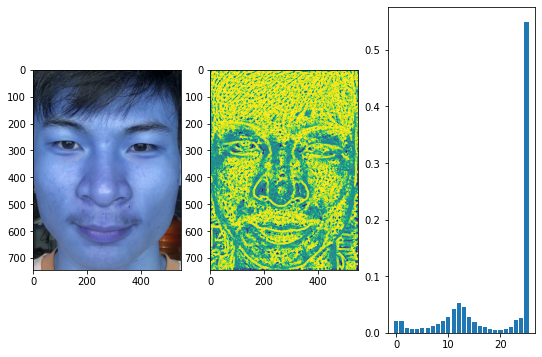

In [ ]:
TEST_PATH = 'images/test2.png'
test_image = cv2.imread(TEST_PATH)

numPoints = 24
radius = 8
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
lbp = feature.local_binary_pattern(gray, numPoints, radius, method="uniform")

# Plot the origin image and local binary pattern of image
fig = plt.figure(figsize=(9, 6))
ax = []
# create subplot and append to ax
fig.add_subplot(1, 3, 1)
plt.imshow(test_image)
fig.add_subplot(1, 3, 2)
plt.imshow(lbp)
fig.add_subplot(1, 3, 3)
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, numPoints + 3), range=(0, numPoints + 2))
hist = hist.astype("float")

hist /= (hist.sum() + 1e-7)
plt.bar(np.arange(0, len(hist)), hist)

plt.show()

Rút trích đặc trưng cho từ tập dữ liệu ảnh

In [ ]:
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
                                           self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, self.numPoints + 3),
                                 range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist

In [ ]:
desc = LocalBinaryPatterns(numPoints=24, radius=8)

In [ ]:
def load_dataset(data_path):
    data = []
    labels = []
    # loop over the training images
    for imagePath in paths.list_images(data_path):
        # load the image, convert it to grayscale, and describe it
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hist = desc.describe(gray)
        # extract the label from the image path, then update the
        # label and data lists
        labels.append(imagePath.split(os.path.sep)[-3])
        data.append(hist)
    return data, labels

In [ ]:
PATH_DATA = './dataset'
print("[INFO] loading images and extracting features")
data, labels = load_dataset(data_path=PATH_DATA)

[INFO] loading images and extracting features


### Phân chia dữ liệu huấn luyện

In [ ]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=TEST_SIZE, random_state=42)

### Thử nghiệm các bộ phân lớp

Vì chưa rõ được hiệu quả của các mô hình đối với cách rút trích đặc này cũng như là trên tập dữ liệu thu thập được nên em huấn luyện các bộ phân lớp trên cùng một tập dữ liệu trên tập dữ liệu huấn luyện và đánh giá trên tập dữ liệu kiểm thử được tách ra từ tập dữ liệu thu thập được. 

Tuy nhiên, cần phải đánh giá mô hình trên tập dữ liệu unseen (được thu thập riêng biệt) để kiểm tra khả năng tổng quát của mô hình trong thực tế.

Dưới đây là các bộ phân lớp em thử nghiệm:

- Logistic Regression.

- K-nestest Neighbors (kNN).

- Random Forest.

- Decision Tree.

- Naive Bayes.

- Support Vector Machine (SVM).

- Multilayer Perceptron Learnings (MLPs).



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# The measure of classification problem
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Định nghĩa các bộ phân lớp

logistic_model = LogisticRegression()
kNN_model = KNeighborsClassifier(n_neighbors=2)
randomForest_model = RandomForestClassifier(max_depth=2, random_state=0)
decisionTree_model = tree.DecisionTreeClassifier()
bayes_model = GaussianNB()
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
neuronNet_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                                hidden_layer_sizes=(64, 32, 32, 64, 2),
                                random_state=1)

#### Mô hình logistic regression

Tham khảo: [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
print("[INFO] Logistic Regression model...")
logistic_model.fit(trainX, trainY)
print("- The accuracy of model on training set: {}".format(logistic_model.score(trainX, trainY)))
y_pred = logistic_model.predict(testX)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=testY, y_pred=y_pred)))
print("- The confusion matrix of model on test set: \n{}".format(classification_report(y_true=testY, y_pred=y_pred)))

[INFO] Logistic Regression model...
- The accuracy of model on training set: 0.9882506527415144
- The accuary of model on test set: 0.9921875
- The confusion matrix of model on test set: 
              precision    recall  f1-score   support

        fake       0.99      1.00      0.99       226
        real       0.99      0.99      0.99       158

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384



In [ ]:
# save the model to disk
filename = 'saved_model/hand_crafted_model/logistic_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M")
pickle.dump(logistic_model, open(filename, 'wb'))

#### Mô hình k-nestest Neighbors

Tham khảo: [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
print("[INFO] k-nestest Neighbors model...")
kNN_model.fit(trainX, trainY)
print("- The accuracy of model on training set: {}".format(kNN_model.score(trainX, trainY)))
y_pred = kNN_model.predict(testX)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=testY, y_pred=y_pred)))
print("- The confusion matrix of model on test set: \n{}".format(classification_report(y_true=testY, y_pred=y_pred)))

[INFO] k-nestest Neighbord model...
- The accuracy of model on training set: 1.0
- The accuary of model on test set: 1.0
- The confusion matrix of model on test set: 
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       226
        real       1.00      1.00      1.00       158

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
# save the model to disk
filename = 'saved_model/hand_crafted_model/kNN_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M")
pickle.dump(logistic_model, open(filename, 'wb'))

#### Mô hình Random Forest

Tham khảo: [3.2.4.3.1. sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
print("[INFO] Random Forest model...")
randomForest_model.fit(trainX, trainY)
print("- The accuracy of model on training set: {}".format(randomForest_model.score(trainX, trainY)))
y_pred = randomForest_model.predict(testX)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=testY, y_pred=y_pred)))
print("- The confusion matrix of model on test set: \n{}".format(classification_report(y_true=testY, y_pred=y_pred)))

[INFO] Random Forest model...
- The accuracy of model on training set: 1.0
- The accuary of model on test set: 1.0
- The confusion matrix of model on test set: 
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       226
        real       1.00      1.00      1.00       158

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
# save the model to disk
filename = 'saved_model/hand_crafted_model/randomForest_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M")
pickle.dump(logistic_model, open(filename, 'wb'))

#### Mô hình Decision tree

Tham khảo: [1.10. Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

In [ ]:
print("[INFO] Decision Tree...")
decisionTree_model.fit(trainX, trainY)
print("- The accuracy of model on training set: {}".format(decisionTree_model.score(trainX, trainY)))
y_pred = decisionTree_model.predict(testX)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=testY, y_pred=y_pred)))
print("- The confusion matrix of model on test set: \n{}".format(classification_report(y_true=testY, y_pred=y_pred)))

[INFO] Decision Tree...
- The accuracy of model on training set: 1.0
- The accuary of model on test set: 1.0
- The confusion matrix of model on test set: 
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       226
        real       1.00      1.00      1.00       158

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
# save the model to disk
filename = 'saved_model/hand_crafted_model/decisionTree_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M")
pickle.dump(logistic_model, open(filename, 'wb'))

#### Mô hình Naive Bayes

Tham khảo: [1.9. Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [ ]:
print("[INFO] Naive Bayes model...")
bayes_model.fit(trainX, trainY)
print("- The accuracy of model on training set: {}".format(bayes_model.score(trainX, trainY)))
y_pred = bayes_model.predict(testX)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=testY, y_pred=y_pred)))
print("- The confusion matrix of model on test set: \n{}".format(classification_report(y_true=testY, y_pred=y_pred)))

[INFO] Naive Bayes model...
- The accuracy of model on training set: 0.9941253263707572
- The accuary of model on test set: 0.9973958333333334
- The confusion matrix of model on test set: 
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       226
        real       0.99      1.00      1.00       158

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
# save the model to disk
filename = 'saved_model/hand_crafted_model/bayes_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M")
pickle.dump(logistic_model, open(filename, 'wb'))

#### Mô hình SVM

Tham khảo: [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
print("[INFO] SVM model...")
svm_model.fit(trainX, trainY)
print("- The accuracy of model on training set: {}".format(svm_model.score(trainX, trainY)))
y_pred = svm_model.predict(testX)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=testY, y_pred=y_pred)))
print("- The confusion matrix of model on test set: \n{}".format(classification_report(y_true=testY, y_pred=y_pred)))

[INFO] SVM model...
- The accuracy of model on training set: 1.0
- The accuary of model on test set: 1.0
- The confusion matrix of model on test set: 
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       226
        real       1.00      1.00      1.00       158

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
# save the model to disk
filename = 'saved_model/hand_crafted_model/svm_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M")
pickle.dump(logistic_model, open(filename, 'wb'))

#### Mô hình Neuron network

Tham khảo: [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [ ]:
print("[INFO] Neuron Network model...")
neuronNet_model.fit(trainX, trainY)
print("- The accuracy of model on training set: {}".format(neuronNet_model.score(trainX, trainY)))
y_pred = neuronNet_model.predict(testX)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=testY, y_pred=y_pred)))
print("- The confusion matrix of model on test set: \n{}".format(classification_report(y_true=testY, y_pred=y_pred)))

[INFO] Neuron Network model...
- The accuracy of model on training set: 1.0
- The accuary of model on test set: 1.0
- The confusion matrix of model on test set: 
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       226
        real       1.00      1.00      1.00       158

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
# save the model to disk
filename = 'saved_model/hand_crafted_model/neuronnet_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M")
pickle.dump(logistic_model, open(filename, 'wb'))

### <strike>Đánh giá mô hình trên tập dữ liệu unseen</strike>

## Phương pháp dựa trên deep learning


---



In [ ]:
# Import các thư viện cần dùng
from classifier.livenessnet import LivenessNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import argparse
import pickle
import cv2
import os
import random
import datetime
from utils import plot_progress
%matplotlib inline

### 1. Load dữ liệu

In [ ]:
# Định nghĩa hàm load dữ liệu vào RAM

def load_dataset(dataset_path: str):
    # grab the list of images in our dataset directory, then initialize
    # the list of data (i.e., images) and class images
    print("[INFO] loading images...")
    imagePaths = list(paths.list_images(dataset_path))
    data = []
    labels = []

    # loop over all image paths
    for imagePath in imagePaths:
        # extract the class label from the filename, load the image and
        # resize it to be a fixed 32x32 pixels, ignoring aspect ratio
        label = imagePath.split(os.path.sep)[-3]
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (64, 64))

        # update the data and labels lists, respectively
        data.append(image)
        labels.append(label)
        
    # encode the labels (which are currently strings) as integers and then
    # one-hot encode them
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels = to_categorical(labels, 2)

    return data, labels, le

In [ ]:
PATH_DATASET = "./dataset"
data, labels, le = load_dataset(PATH_DATASET)

[INFO] loading images...


Xem thông tin của tập dữ liệu

In [ ]:
print("[INFO] The dataset...")
print("- The size of dataset {}".format(len(labels)))
fake_indices = [index for index in range(len(data)) if np.argmax(labels[index]) == 0] 
print("- The number of fake (0) face image is {}".format(len(fake_indices)))
print("- The number of real (1) face image is {}".format(len(labels) - len(fake_indices)))

[INFO] The dataset...
- The size of dataset 1916
- The number of fake (0) face image is 1115
- The number of real (1) face image is 801


In [ ]:
def plot_images(data, indices, column: int):
    fig = plt.figure(figsize=(9, 6))
    row = len(indices) // column
    ax = []
    for i in range(column*row):
        # create subplot and append to ax
        ax.append(fig.add_subplot(row, column, i+1))
        plt.imshow(data[indices[i]])
        
    plt.show()

Visualize 20 ảnh chứa khuôn mặt <b>giả mạo</b> trong tập dữ liệu.

Fake face....


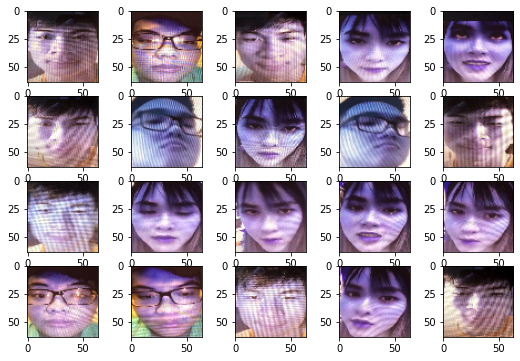

In [ ]:
indices = list(set(np.random.choice(len(fake_indices), 20)))
print("Fake face....")
plot_images(data, indices=indices, column=5)

Visualize 20 ảnh chứa khuôn mặt <b>thật</b> trong tập dữ liệu

Real face...


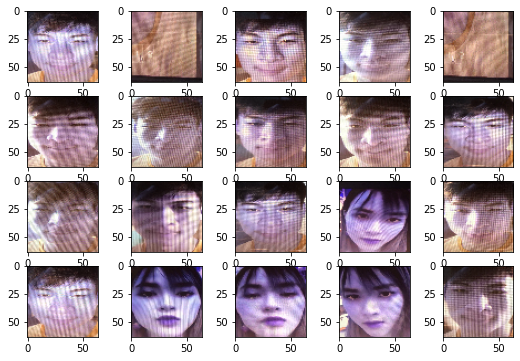

In [ ]:
real_indices = [index for index in range(len(data)) if np.argmax(labels[index]) == 1]
print("Real face...")
indices = list(set(np.random.choice(len(real_indices), 20)))
plot_images(data, indices=indices, column=5)

### 2. Chia dữ liệu huấn luyện

In [ ]:
# convert the data into a NumPy array, then preprocess it by scaling
# all pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

In [ ]:
TEST_SIZE = 0.2
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=TEST_SIZE, random_state=42)

### 3. Xây dựng mô hình

Sử dụng các kiến trúc mạng dựa trên CNNs (Convolutional Neuron Network).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [ ]:
height, width, depth = data[0].shape

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

# if we are using "channels first", update the input shape
# and channels dimension
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(16, (3, 3), padding="same",
    input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(len(trainY[0])))
model.add(Activation("softmax"))

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

In [ ]:
# Setup hyper-parameters
EPOCHS = 50
BATCH_SIZE = 32
INIT_LEARNING_RATE = 1e-4

In [ ]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LEARNING_RATE, decay=INIT_LEARNING_RATE / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


### 4. Huấn luyện mô hình

In [ ]:
# train the network
print("[INFO] training network for {} epochs...".format(EPOCHS))
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
                         validation_data = (testX, testY),
                         steps_per_epoch = len(trainX) // BATCH_SIZE, 
                         epochs=EPOCHS)

[INFO] training network for 50 epochs...
Epoch 1/50
47/47 [==============================] - 19s 399ms/step - loss: 0.2793 - accuracy: 0.9013 - val_loss: 0.5649 - val_accuracy: 0.9531
Epoch 2/50
47/47 [==============================] - 19s 398ms/step - loss: 0.0499 - accuracy: 0.9840 - val_loss: 0.6542 - val_accuracy: 0.4531
Epoch 3/50
47/47 [==============================] - 18s 393ms/step - loss: 0.0355 - accuracy: 0.9840 - val_loss: 0.8648 - val_accuracy: 0.4271
Epoch 4/50
47/47 [==============================] - 19s 395ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 1.0548 - val_accuracy: 0.4401
Epoch 5/50
47/47 [==============================] - 19s 397ms/step - loss: 0.0339 - accuracy: 0.9847 - val_loss: 1.2534 - val_accuracy: 0.4375
Epoch 6/50
47/47 [==============================] - 19s 396ms/step - loss: 0.0279 - accuracy: 0.9927 - val_loss: 0.8864 - val_accuracy: 0.5052
Epoch 7/50
47/47 [==============================] - 19s 397ms/step - loss: 0.0121 - accuracy: 0.9960 

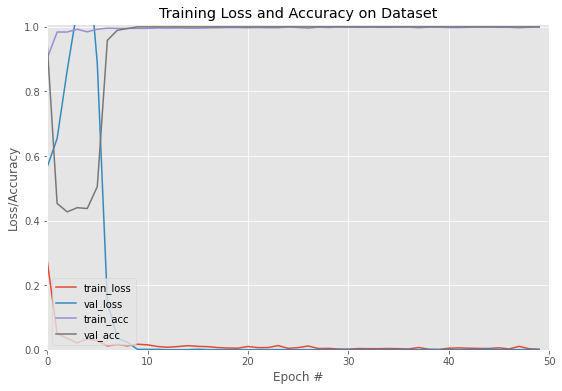

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
ax.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
ax.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
ax.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
ax.set_title("Training Loss and Accuracy on Dataset")
ax.set_xlabel("Epoch #")
ax.set_ylabel("Loss/Accuracy")

plt.xlim(0, EPOCHS)
plt.ylim(0, 1.01)
plt.legend(loc="lower left")

plt.show()

In [ ]:
# Save the training progress to memory
if not os.path.exists("progress"):
    os.mkdir("progress")
name = datetime.datetime.now().strftime("%Y%m%d-%H%M")
plt.savefig("progress/plot_" + name)

<Figure size 432x288 with 0 Axes>

### Đánh giá mô hình

In [ ]:
predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
print(classification_report(y_true=testY.argmax(axis=1), y_pred=predictions.argmax(axis=1), target_names=le.classes_))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       226
        real       1.00      1.00      1.00       158

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
# Lưu mô hình
print("[INFO] Saving model...")
model.save("saved_model/deep_learning_model/model_" + name, save_format="h5")

[INFO] Saving model...


In [ ]:
# Lưu predicted labels
f = open("label_encoded/label_encoded" + name + ".pl", "wb")
f.write(pickle.dumps(le))
f.close()

### <strike>Đánh giá mô hình trên tập dữ liệu unseen</strike>

## Thực nghiệm trong thực tế

Tại mỗi thời điểm, webcam của máy tính sẽ ghi lại hình ảnh để thực hiện tác vụ phát hiện khuôn mặt giả mạo được mô tả dưới đây:

- Bước 1: sử dụng một detector được hỗ trợ bởi thư viện OpenCV để phát hiện các khuôn mặt trong mỗi frame hình.

- Bước 2: Đưa các khuôn mặt được phát hiện vào mô hình chúng ta đã huấn luyện được để phân loại đó là khuôn mặt thật hay giả mạo.

- Bước 3: Thể hiện kết quả qua việc vẽ các bounding boxes (khung hình chữ nhật bao quanh khuôn mặt) và class (fake hoặc real) cho các khuôn mặt xuất hiện tại thời điểm đó.

## Một số vấn đề

- Dữ liệu thu thập được ít nên các mô hình huấn luyện chưa có khả năng khái quá các khái niệm, hay nói cách khác đó là mô hình khi đưa vào sử dụng thực tế không có độ chính xác như mong đợi.

- Ngoài độ đo là accuracy, precision, recall, bài toán Liveness detection được đánh giá bởi các một số độ đo chuẩn, đó là Equal Error Rate (EER), Attack Presentation Classification Error Rate (APCER), Bona fide presentation classification error rate(BPCER).

- <strike>Sử dụng kĩ thuật Transfer Learning cho phương pháp dựa trên Deep Learning bằng các mô hình đã được huấn luyện như VGG, AlexNet, InceptionNet, ResNet.</strike>


## Tham khảo

[1] A. Khodabakhsh, R. Ramachandra, K. Raja, P. Wasnik and C. Busch, "Fake Face Detection Methods: Can They Be Generalized?," 2018 International Conference of the Biometrics Special Interest Group (BIOSIG), Darmstadt, 2018, pp. 1-6, doi: 10.23919/BIOSIG.2018.8553251.

[2] T. Ojala, M. Pietikainen and T. Maenpaa, "Multiresolution gray-scale and rotation invariant texture classification with local binary patterns," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 24, no. 7, pp. 971-987, July 2002, doi: 10.1109/TPAMI.2002.1017623.

[3] [Local Binary Patterns with Python & OpenCV](https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/)

[4] [Real and Fake Face Detection](https://www.kaggle.com/ciplab/real-and-fake-face-detection)

[5] [Liveness Detection with OpenCV](https://www.pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/)






<center><i><b> ---- Hết---- </b></i></center>